    Imports

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [10]:
df_hdf = pd.read_csv("data/hdf_dataset.csv", index_col="date_heure", parse_dates = True)
df_hdf.index = pd.to_datetime(df_hdf.index, utc=True)    ## Conversion en datetime64

In [12]:
print(type(df_hdf.index))
df_hdf.sample(1)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,consommation_brute_electricite_rte
date_heure,
2017-02-02 22:30:00+00:00,6484


    1. A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

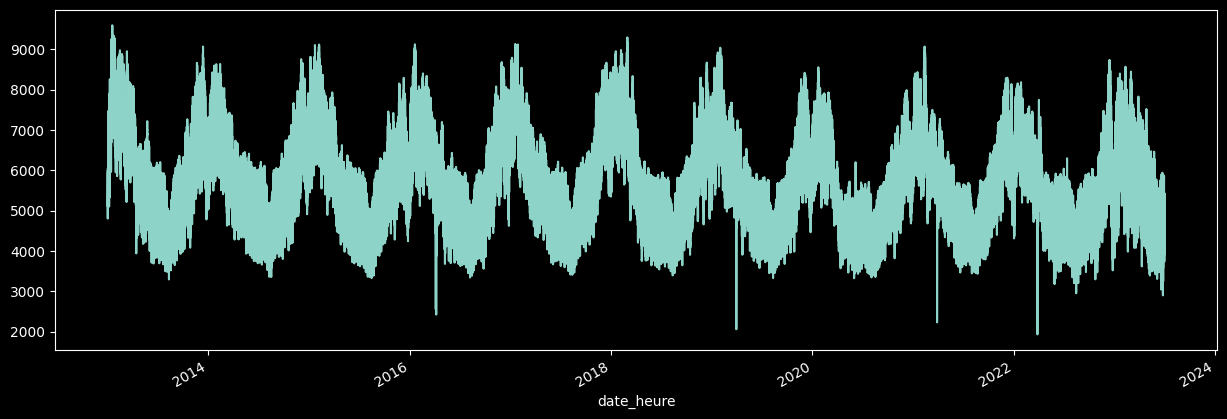

In [13]:
plt.style.use('dark_background')
df_hdf["consommation_brute_electricite_rte"].plot(figsize=(15, 5))
plt.show()


    2. Affichez cette même série temporelle en rassemblant par année, trimestre, mois, semaine, jour


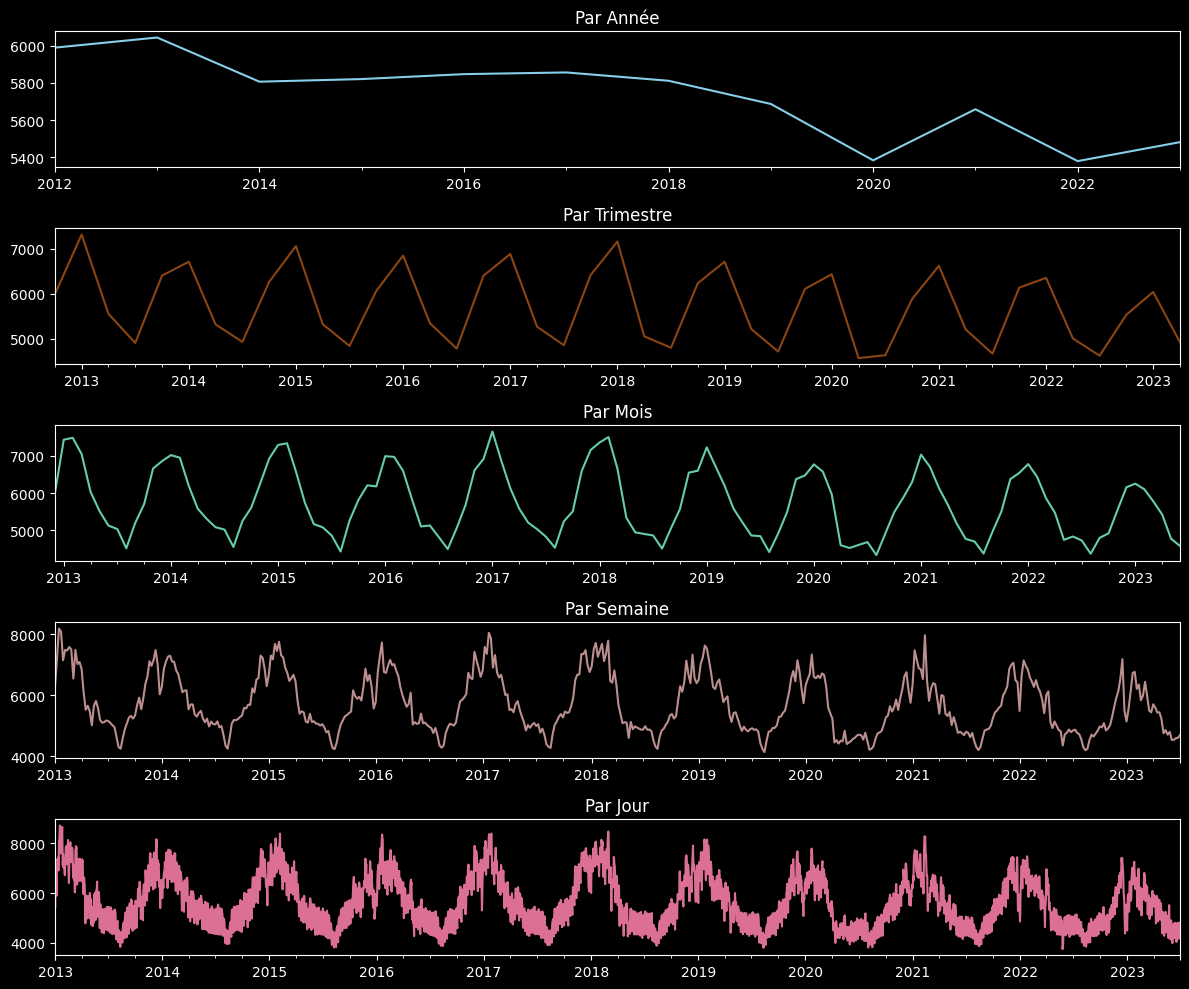

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10))

df_hdf.resample('Y')['consommation_brute_electricite_rte'].mean().plot(ax=axes[0], color='skyblue')  ### ANNÉE
axes[0].set_title('Par Année') 

df_hdf.resample('Q')['consommation_brute_electricite_rte'].mean().plot(ax=axes[1], color='saddlebrown')  ### TRIMESTRE
axes[1].set_title('Par Trimestre')

df_hdf.resample('M')['consommation_brute_electricite_rte'].mean().plot(ax=axes[2], color='mediumaquamarine') ### MOIS
axes[2].set_title('Par Mois')

df_hdf.resample('W')['consommation_brute_electricite_rte'].mean().plot(ax=axes[3], color='rosybrown') ### SEMAINE
axes[3].set_title('Par Semaine')

df_hdf.resample('D')['consommation_brute_electricite_rte'].mean().plot(ax=axes[4], color='palevioletred') ### JOUR
axes[4].set_title('Par Jour')

for ax in axes: # Supprime les légendes inutiles
    ax.set_xlabel('')
    ax.set_ylabel('')


plt.tight_layout()  # Mise en page
plt.show()   # Affichage

    3. A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

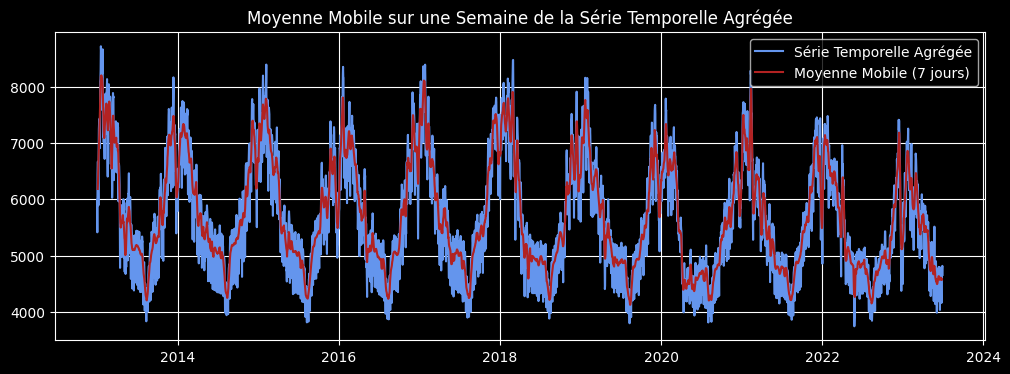

In [16]:
serie_agregee = df_hdf.consommation_brute_electricite_rte.resample('D').mean()  ### Série agrégée à la journée

moyenne_mobile = serie_agregee.rolling(window=7, center=True, win_type=None).mean() ### Moyenne mobile centrée et symétrique sur 7 jours

plt.figure(figsize=(12, 4))
plt.plot(serie_agregee, label='Série Temporelle Agrégée', color='cornflowerblue')
plt.plot(moyenne_mobile, label='Moyenne Mobile (7 jours)', color='firebrick')

plt.title('Moyenne Mobile sur une Semaine de la Série Temporelle Agrégée')
plt.legend()
plt.grid(True)
plt.show()

    4. Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

Lors des agrégations, nous avons simplement observé la moyenne depuis différents amplitudes de temps, afin de réduire la granularité des données et obtenir des choses plus lisibles au vu de la quantité de données. Le nombre de points par contre est réduit.
En revanche, avec la moyenne mobile nous avons lissé les données en donnant à chaque point une nouvelle valeur basée sur la moyenne de la fenêtre de 7 jours (3 jours précedents, jour en cours, 3 jours suivants) dans le but ce coup-ci d'observer plus facilement les tendances temporelles, et d'estimer les valeurs manquantes et réduire le bruit des données. La saisonnalité est moins forte mais le nombre de point reste inchangé.

    5. A l’aide de box-plots, observez la saisonnalité: Trimestrielle, Mensuelle, Hebdomadaire, Journalière


In [17]:
df_hdf_saison = df_hdf.copy()
df_hdf_saison['trimestre'] = df_hdf_saison.index.quarter
df_hdf_saison['mois'] = df_hdf_saison.index.month
df_hdf_saison['jour_semaine'] = df_hdf_saison.index.weekday  # Jour de la semaine (0 = Lundi, 6 = Dimanche)
df_hdf_saison['heure'] = df_hdf_saison.index.hour

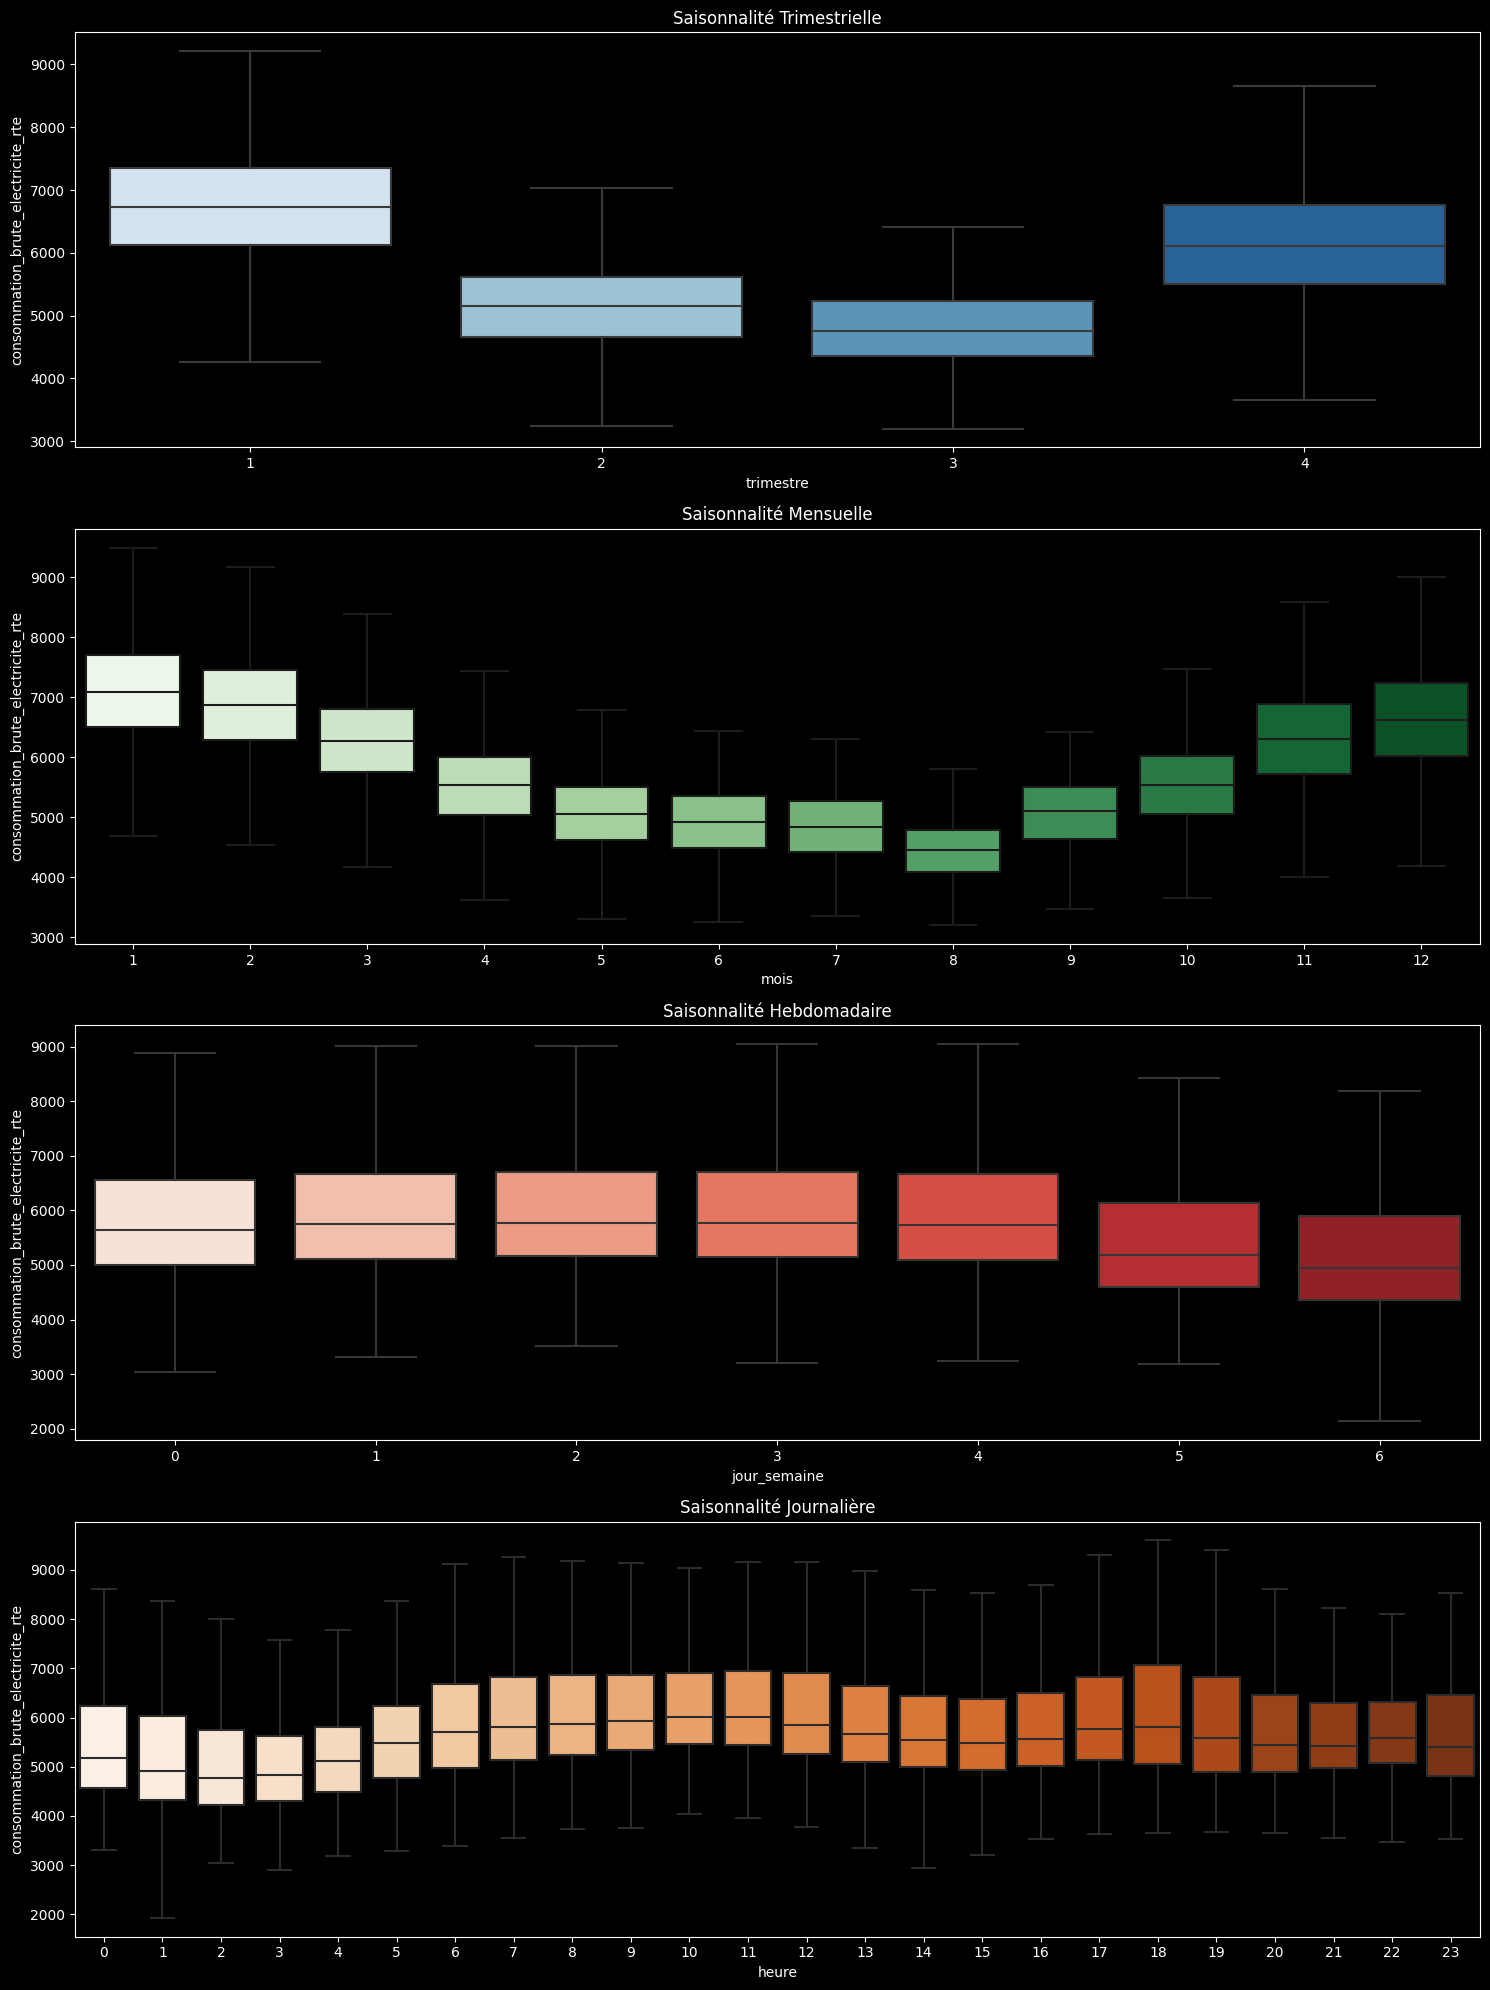

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(4, 1, figsize=(15, 20))

sns.boxplot(data=df_hdf_saison, x='trimestre', y='consommation_brute_electricite_rte', ax=axes[0], showfliers=False, palette="Blues")
axes[0].set_title('Saisonnalité Trimestrielle')     ### TRIMESTRE

sns.boxplot(data=df_hdf_saison, x='mois', y='consommation_brute_electricite_rte', ax=axes[1], showfliers=False, palette="Greens")
axes[1].set_title('Saisonnalité Mensuelle')     ### MOIS

sns.boxplot(data=df_hdf_saison, x='jour_semaine', y='consommation_brute_electricite_rte', ax=axes[2], showfliers=False, palette="Reds")
axes[2].set_title('Saisonnalité Hebdomadaire')      ### SEMAINE

sns.boxplot(data=df_hdf_saison, x='heure', y='consommation_brute_electricite_rte', ax=axes[3], showfliers=False, palette="Oranges")
axes[3].set_title('Saisonnalité Journalière')       ### HEURE

plt.tight_layout()
plt.show()

warnings.resetwarnings()

    6. Qu’est ce que la stationnarité? 

C'est une propriété des séries temporelles où les statistiques comme la moyenne, la variance, la structure de la corrélation restent constantes à travers le temps.  
On note alors l'abscence de tendance et de saisonnalité sur une série stationnaire.

    7. Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire?

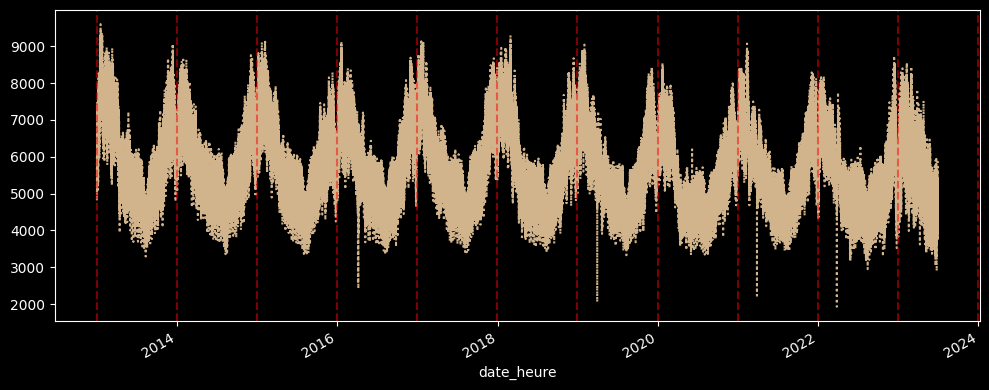

In [25]:
df_hdf.consommation_brute_electricite_rte.plot(figsize=(10, 4), color='tan', linestyle='dotted', markersize=0.1) # Serie temporellle

unique_years = df_hdf.index.year.unique()
for year in unique_years:                       # Ajoutez une barre verticale à la fin de chaque année
    year_end = pd.to_datetime(f'{year}-12-31')
    plt.axvline(year_end, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show() # Affichage

^^^ Visuellement, la série temporelle n'est pas stationnaire car on observe une répétition de la saisonnalité annuelle

    8. Réalisez un test de Dickey Fuller

In [21]:
import statsmodels.api as sm #### <-
from statsmodels.tsa.stattools import adfuller, kpss

In [22]:
result = sm.tsa.adfuller(df_hdf['consommation_brute_electricite_rte'])

# Extraire la statistique t et la p-value
t_statistique, p_valeur, _, _, _, _ = result

# Interprétation des résultats
if p_valeur <= 0.05:
    print("La série temporelle est stationnaire (rejette H0)")
else:
    print("La série temporelle n'est pas stationnaire (ne rejette pas H0)")

# Affichez la statistique t et la p-value
print(f"Statistique t : {t_statistique}")
print(f"P-valeur : {p_valeur}")

La série temporelle est stationnaire (rejette H0)
Statistique t : -18.16769306161597
P-valeur : 2.4517349101336326e-30


In [29]:
result = adfuller(df_hdf["consommation_brute_electricite_rte"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():   ### ADF Test
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -18.16769306161597
p-value: 2.4517349101336326e-30
Critial Values:
   1%, -3.4303855589157255
Critial Values:
   5%, -2.8615557165626675
Critial Values:
   10%, -2.566778365362579


    Quelle est l’hypothèse nulle et l’hypothèse alternative ?  

L'hypothèse nulle (H0) est que la série n'est pas stationnaire, l'hypothèse alternative (H1) est que la série est stationnaire 

    Quelle est la statistique calculée et quelle distribution théorique suit elle d’après l’hypothèse nulle.

La statistique "t" calcule à quel point la serie est stationnaire en estimant que si la valeur p est inferieure ou égale à 0.05 elle est stationnaire.

    Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne un valeur aussi extrême voir plus extrême?

In [30]:
"{:.30f}".format(p_valeur)      ### Valeur de P sans écriture scientifique

'0.000000000000000000000000000002'

^^^ La P Value étant très faible, cela signifie qu'il y avait une probabilité tout aussi petite que l'hypothèse H1 soit averée.  
On peut donc interpeter que le test n'a pas réussi

    9. Même consigne pour le test de KPSS

In [34]:
result = kpss(df_hdf["consommation_brute_electricite_rte"], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():        ### KPSS Test
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 11.922381
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/tmp/ipykernel_195358/1962453018.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_hdf["consommation_brute_electricite_rte"], regression='c')


^^^ Le test est cohérent, il est difficile de rejeter ici l'hypothèse nulle d'une stationnarité autour d'un trend.

    10. Désaisonnalisez la composante annuelle de votre time série est utilisez à nouveau le test de Dickey Fuller.

In [41]:
df_day = df_hdf.resample('D').mean()

<Axes: xlabel='date_heure'>

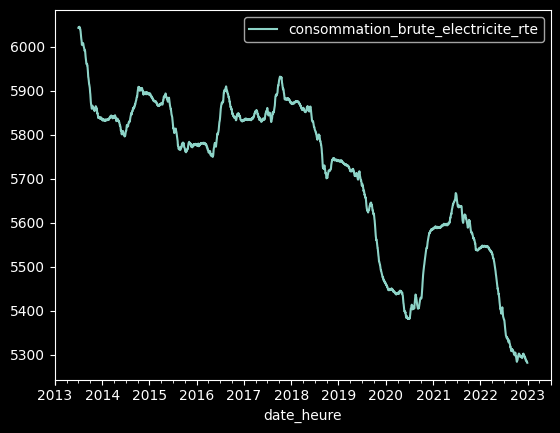

In [42]:
df_day.rolling(window=365,center=True, win_type=None).mean().plot()

In [43]:
df_rolling_year = df_day.rolling(window=365,center=True, win_type=None).mean()
df_rolling_year = df_rolling_year[~df_rolling_year["consommation_brute_electricite_rte"].isna()]
                ### Désaisonnalisation en lissant sur l'année

In [45]:
result = adfuller(df_rolling_year["consommation_brute_electricite_rte"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():        ### ADF Test
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.48196974836528694
p-value: 0.8954872138995966
Critial Values:
   1%, -3.4322523797568776
Critial Values:
   5%, -2.862380562266727
Critial Values:
   10%, -2.567217446677258


    Que comprenez vous de ce résultat?

Désaisonnalisée, le test interprète la serie comme <u>non stationnaire</u>

    11. Sur la time serie désaisonnalisée, réalisez à nouveau un test de KPSS. 

In [46]:
result = kpss(df_rolling_year["consommation_brute_electricite_rte"], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():        ### KPSS Test
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 6.912275
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/tmp/ipykernel_195358/2538188078.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_rolling_year["consommation_brute_electricite_rte"], regression='c')


    Que peut-on en conclure?

Même résultat, le test KPSS l'intrpète comme <u>non stationnaire</u> même autour d'un trend

On voit ici que les tests statistiques contre-disent notre intuition. C'est assez classique dans les séries temporelles. L'approche graphique est souvent la plus pertinente, il est évident ici qu'il existe une saisonnalité.

Le fait de ne pas pouvoir se fier aux tests est ce qui constitue la grande difficulté des time series, il est assez difficile d'automatiser les études. Il est souvent nécessaire de revenir à une approche graphique.

    12. Pour vous la série temporelle est plutôt additive ou multiplicative? 

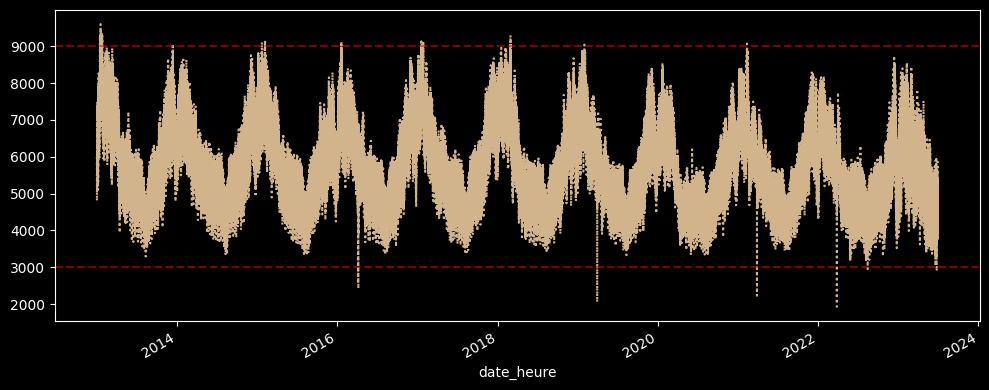

In [49]:
df_hdf.consommation_brute_electricite_rte.plot(figsize=(10, 4), color='tan', linestyle='dotted', markersize=0.1) 
        # Serie temporellle

max_value = 9000        #### Traçage des barres
min_value = 3000
plt.axhline(max_value, color='red', linestyle='--', alpha=0.5, label=f'Max: {max_value}')
plt.axhline(min_value, color='red', linestyle='--', alpha=0.5, label=f'Min: {min_value}')
        
plt.tight_layout()  ## Affichage
plt.show()


^^^ Visuellement, on peut imaginer des barres paralèlles qui suivent l'oscillation de la série. Ce qui veut dire qu'elle est <i><u>additive</u></i>.